In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Create Trianing

In [2]:
# Feature set containing 25 * 2 for 25 (x,y) values of known/training data that are random integers 0-99
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1. Response is a random integers 0-1 of 25 * 1 values
responses = np.random.randint(0,3,(25,1)).astype(np.float32) #responses 25 x 1 matrix 

In [3]:
responses

array([[2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [4]:
print ("Training Data:\n", trainData)
#print("\n Responses:\n", responses)
print("Responses Ravel or flattened as 1-D:\n", responses.ravel()) #Method .ravel flattens the np array to 1-D. 
#color 0 is "Red", color 1 is "blue", color 2 is "yellow"

Training Data:
 [[59. 57.]
 [74.  7.]
 [15. 68.]
 [45. 47.]
 [ 6. 63.]
 [65. 21.]
 [65. 34.]
 [19. 34.]
 [73. 18.]
 [90. 35.]
 [43. 85.]
 [ 6. 33.]
 [ 8. 60.]
 [60.  6.]
 [37. 39.]
 [18. 15.]
 [76. 89.]
 [40. 64.]
 [84. 84.]
 [25. 95.]
 [46. 55.]
 [24.  2.]
 [51. 66.]
 [ 3. 85.]
 [59. 89.]]
Responses Ravel or flattened as 1-D:
 [2. 1. 0. 0. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 0. 0. 2. 0. 2. 0. 0. 2. 1. 0.
 0.]


In [5]:
# Make red, blue, yellow
red = trainData[responses.ravel()==0] #red is now trained data with responses of 0
print(red)
blue = trainData[responses.ravel()==1] #blue is now the trained data with responses of 1 
print(blue)
yellow = trainData[responses.ravel()==2] #yellow is now the trained data with responses of 2
print(yellow)

[[15. 68.]
 [45. 47.]
 [ 6. 63.]
 [37. 39.]
 [18. 15.]
 [40. 64.]
 [25. 95.]
 [46. 55.]
 [ 3. 85.]
 [59. 89.]]
[[74.  7.]
 [90. 35.]
 [51. 66.]]
[[59. 57.]
 [65. 21.]
 [65. 34.]
 [19. 34.]
 [73. 18.]
 [43. 85.]
 [ 6. 33.]
 [ 8. 60.]
 [60.  6.]
 [76. 89.]
 [84. 84.]
 [24.  2.]]


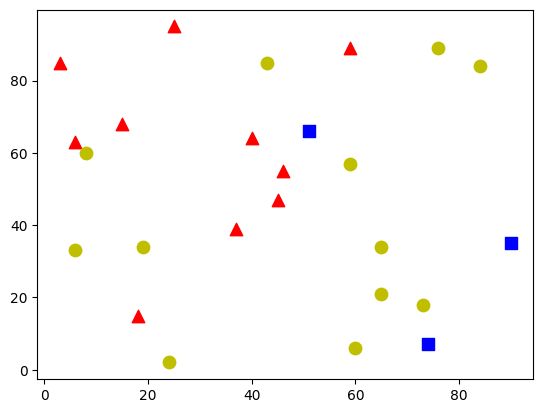

<Figure size 640x480 with 0 Axes>

In [6]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
plt.scatter(red[:,0],red[:,1],80,'r','^') #size 80, red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #size 80, blue, square
plt.scatter(yellow[:,0],yellow[:,1],80,'y','o') #size 80, yellow, circle
plt.show()
#plt.savefig('graph_no_newcomer.png')

### Test unknow data

In [7]:
#create 1 * 2 or 1 (x,y) value with random integer 0-99
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
print(newcomer)

[[85. 29.]]


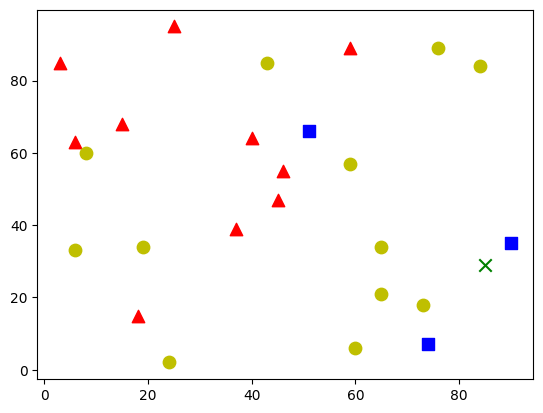

<Figure size 640x480 with 0 Axes>

In [8]:
plt.scatter(red[:,0],red[:,1],80,'r','^') #red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #blue, square
plt.scatter(yellow[:,0],yellow[:,1],80,'y','o') #yellow, circle
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','x') #green, x
plt.show()
#plt.savefig('graph_newcomer.png', format='png')

In [9]:
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
k=4
ret, results, neighbours, dist = knn.findNearest(newcomer, k)

In [10]:
results = results.ravel().astype(int)
neighbours = neighbours.ravel().astype(int).astype(str)
dist = dist.ravel().astype(int)

In [11]:
if results[0] == 0:
    results = "Red"
elif results[0] == 1:
    results = "Blue"
elif results[0] == 2:
    results = "Yellow"

for i in range(k):
    if neighbours[i] == '0':
        neighbours[i] = "Red"
    elif neighbours[i] == '1':
        neighbours[i] = "Blue"
    elif neighbours[i] == '2':
        neighbours[i] = "Yellow"


In [12]:
print("Result: ", results)
print("Nearest Neighbors: ", neighbours)
print("Distance: ", dist)

Result:  Yellow
Nearest Neighbors:  ['Blue' 'Yellow' 'Yellow' 'Yellow']
Distance:  [ 61 265 425 464]
